# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
    - Linear estimate of a causal relationship between two variables.
- What type of machine learning is linear regression?
    - Supervised machine learning.
- What is a “line of best fit” using the OLS method?
    - Minimizes the distance between data points using a single line.
- What is the difference between correlation and regression?
    - Correlation measures the realationship between two variables whereas regression measure the affects one has on the other.
- Describe a scenario when you would use linear regression and why you would use it. 
    - To measure the relationship between years of education and how that impacts salary.

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
    - Assumes x and y have linear relationship.
- Normality
    - Assumes x and y are normally distributed.
- Homoscedasticity
    - Variance of error terms shoud be constant.
- No multicollinearity
    - Variables should be independent meaning low correlation.
- No endogeneity
    - Error terms should be normally distributed.
- No autocorrelation
    - Error terms should be independent of each other.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
    - This tells us where the regression line intercepts the y axis on the plot.  This is the predicted y value when x is 0.
- Coefficient of Independent Variable (B1)
    - Slope of the regression line.  When X goes up by 1 unit Y goes up by b1.
- Standard Error
    - Average distance that each point falls from the regression line.
- T-Statistic
    - Helps to determine how linear or non-linear the relationship is.
- P-Value of T-Statistic (from the independent variable)
    - Measure the strength of the relationship between the variables.  If less than .05 it would typically indicate that it is statistically significant relationship.

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
    - Measuring tool that helps describe the quality of the regression model.  0-1.  Larger the better model.
- Adjusted R-squared
    - Used when there are multiple independent variables.  Original R squared is adjusted when there are mutiple variables incorporated.

### Step 5:  Interpret Results Table

- In this example, what is the name of the dependent variable and what is the name of the independent variable?
    - Dependent = Salary, Independent = years of experience
- In this example, how much of the variability in the data is explained by the model?
    - 95.7%
- What is the p-value of the t-statistic in this example? Is this result considered to be statistically significant?
    - 0.00.  Yes, it's less than .05.
- What is the intercept/constant?
    - 2.579
- What is the coefficient of the independent variable?
    - 9449

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [2]:
# make necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
%matplotlib inline


In [6]:
# load data
df = pd.read_csv('master.csv')

In [13]:
df

id  sale_price        date  beds  baths  sqft_living  sqft_lot  \
0      7129300520      221900  2014-10-13     3   1.00         1180    5650.0   
1      6414100192      538000  2014-12-09     3   2.25         2570    7242.0   
2      5631500400      180000  2015-02-25     2   1.00          770   10000.0   
3      2487200875      604000  2014-12-09     4   3.00         1960    5000.0   
4      1954400510      510000  2015-02-18     3   2.00         1680    8080.0   
...           ...         ...         ...   ...    ...          ...       ...   
20458   263000018      360000  2014-05-21     3   2.50         1530    1131.0   
20459  6600060120      400000  2015-02-23     4   2.50         2310    5813.0   
20460  1523300141      402101  2014-06-23     2   0.75         1020    1350.0   
20461   291310100      400000  2015-01-16     3   2.50         1600    2388.0   
20462  1523300157      325000  2014-10-15     2   0.75         1020    1076.0   

       floors  is_waterfront  view  condition  grade  sqft_above  sqft_below  \
0         1.0              0     1          3    7.0      1180.0           0   
1         2.0              0     1          3    7.0      2170.0         400   
2         1.0              0     1          3    6.0       770.0           0   
3         1.0              0     1          5    7.0      1050.0         910   
4         1.0              0     1          3    8.0      1680.0           0   
...       ...            ...   ...        ...    ...         ...         ...   
20458     3.0              0     1          3    8.0      1530.0           0   
20459     2.0              0     1          3    8.0      2310.0           0   
20460     2.0              0     1          3    7.0      1020.0           0   
20461     2.0              0     1          3    8.0      1600.0           0   
20462     2.0              0     1          3    7.0      1020.0           0   

        year_built    zip      lat     long  sqft_living_15  sqft_lot_15  
0      1955.000000  98178  47.5112 -122.257            1340         5650  
1      1951.000000  98125  47.7210 -122.319            1690         7639  
2      1933.000000  98028  47.7379 -122.233            2720         8062  
3      1965.000000  98136  47.5208 -122.393            1360         5000  
4      1987.000000  98074  47.6168 -122.045            1800         7503  
...            ...    ...      ...      ...             ...          ...  
20458  2009.000000  98103  47.6993 -122.346            1530         1509  
20459  2014.000000  98146  47.5107 -122.362            1830         7200  
20460  1970.958079  98144  47.5944 -122.299            1020         2007  
20461  2004.000000  98027  47.5345 -122.069            1410         1287  
20462  2008.000000  98144  47.5941 -122.299            1020         1357  

[20463 rows x 20 columns]

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [8]:
# explore data below (you will need to make new cells)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20463 entries, 0 to 20462
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20463 non-null  int64  
 1   sale_price      20463 non-null  int64  
 2   date            20463 non-null  object 
 3   beds            20463 non-null  int64  
 4   baths           20463 non-null  float64
 5   sqft_living     20463 non-null  int64  
 6   sqft_lot        20463 non-null  float64
 7   floors          20463 non-null  float64
 8   is_waterfront   20463 non-null  int64  
 9   view            20463 non-null  int64  
 10  condition       20463 non-null  int64  
 11  grade           20463 non-null  float64
 12  sqft_above      20463 non-null  float64
 13  sqft_below      20463 non-null  int64  
 14  year_built      20463 non-null  float64
 15  zip             20463 non-null  int64  
 16  lat             20463 non-null  float64
 17  long            20463 non-null 

In [11]:
df.describe()

id    sale_price          beds         baths   sqft_living  \
count  2.046300e+04  2.046300e+04  20463.000000  20463.000000  20463.000000   
mean   4.634853e+09  4.864390e+05      3.310121      2.032015   1942.078483   
std    2.877661e+09  2.399108e+05      0.856078      0.689183    724.361841   
min    1.000102e+06  3.209000e+03      1.000000      0.000000    370.000000   
25%    2.160650e+09  3.120000e+05      3.000000      1.500000   1390.000000   
50%    3.992700e+09  4.350000e+05      3.000000      2.000000   1840.000000   
75%    7.386405e+09  6.020000e+05      4.000000      2.500000   2410.000000   
max    9.900000e+09  1.640000e+06      6.000000      4.250000   4600.000000   

            sqft_lot        floors  is_waterfront          view     condition  \
count   20463.000000  20463.000000   20463.000000  20463.000000  20463.000000   
mean    10302.557928      1.473586       0.004154      1.179104      3.411279   
std     12702.126429      0.537949       0.064318      0.661011      0.652007   
min       520.000000      1.000000       0.000000      1.000000      1.000000   
25%      5000.000000      1.000000       0.000000      1.000000      3.000000   
50%      7410.000000      1.000000       0.000000      1.000000      3.000000   
75%     10021.500000      2.000000       0.000000      1.000000      4.000000   
max    133729.000000      3.500000       1.000000      5.000000      5.000000   

             grade    sqft_above    sqft_below    year_built           zip  \
count  20463.00000  20463.000000  20463.000000  20463.000000  20463.000000   
mean       7.51449   1679.134431    262.933245   1969.987488  98079.694033   
std        1.02699    682.991290    390.853185     29.355935     53.693020   
min        3.00000    300.000000      0.000000   1900.000000  98001.000000   
25%        7.00000   1170.000000      0.000000   1950.500000  98033.000000   
50%        7.00000   1500.000000      0.000000   1972.000000  98072.000000   
75%        8.00000   2080.000000    520.000000   1995.000000  98118.000000   
max       12.00000   3960.000000   1540.000000   2015.000000  98199.000000   

                lat          long  sqft_living_15    sqft_lot_15  
count  20463.000000  20463.000000    20463.000000   20463.000000  
mean      47.559217   -122.219588     1902.177540    9918.097982  
std        0.139311      0.138557      585.071814   13939.307060  
min       47.155900   -122.512000      399.000000     651.000000  
25%       47.467250   -122.332000     1460.000000    5000.000000  
50%       47.569700   -122.245000     1790.000000    7490.000000  
75%       47.679350   -122.134000     2260.000000    9681.000000  
max       47.777600   -121.315000     3790.000000  310582.000000

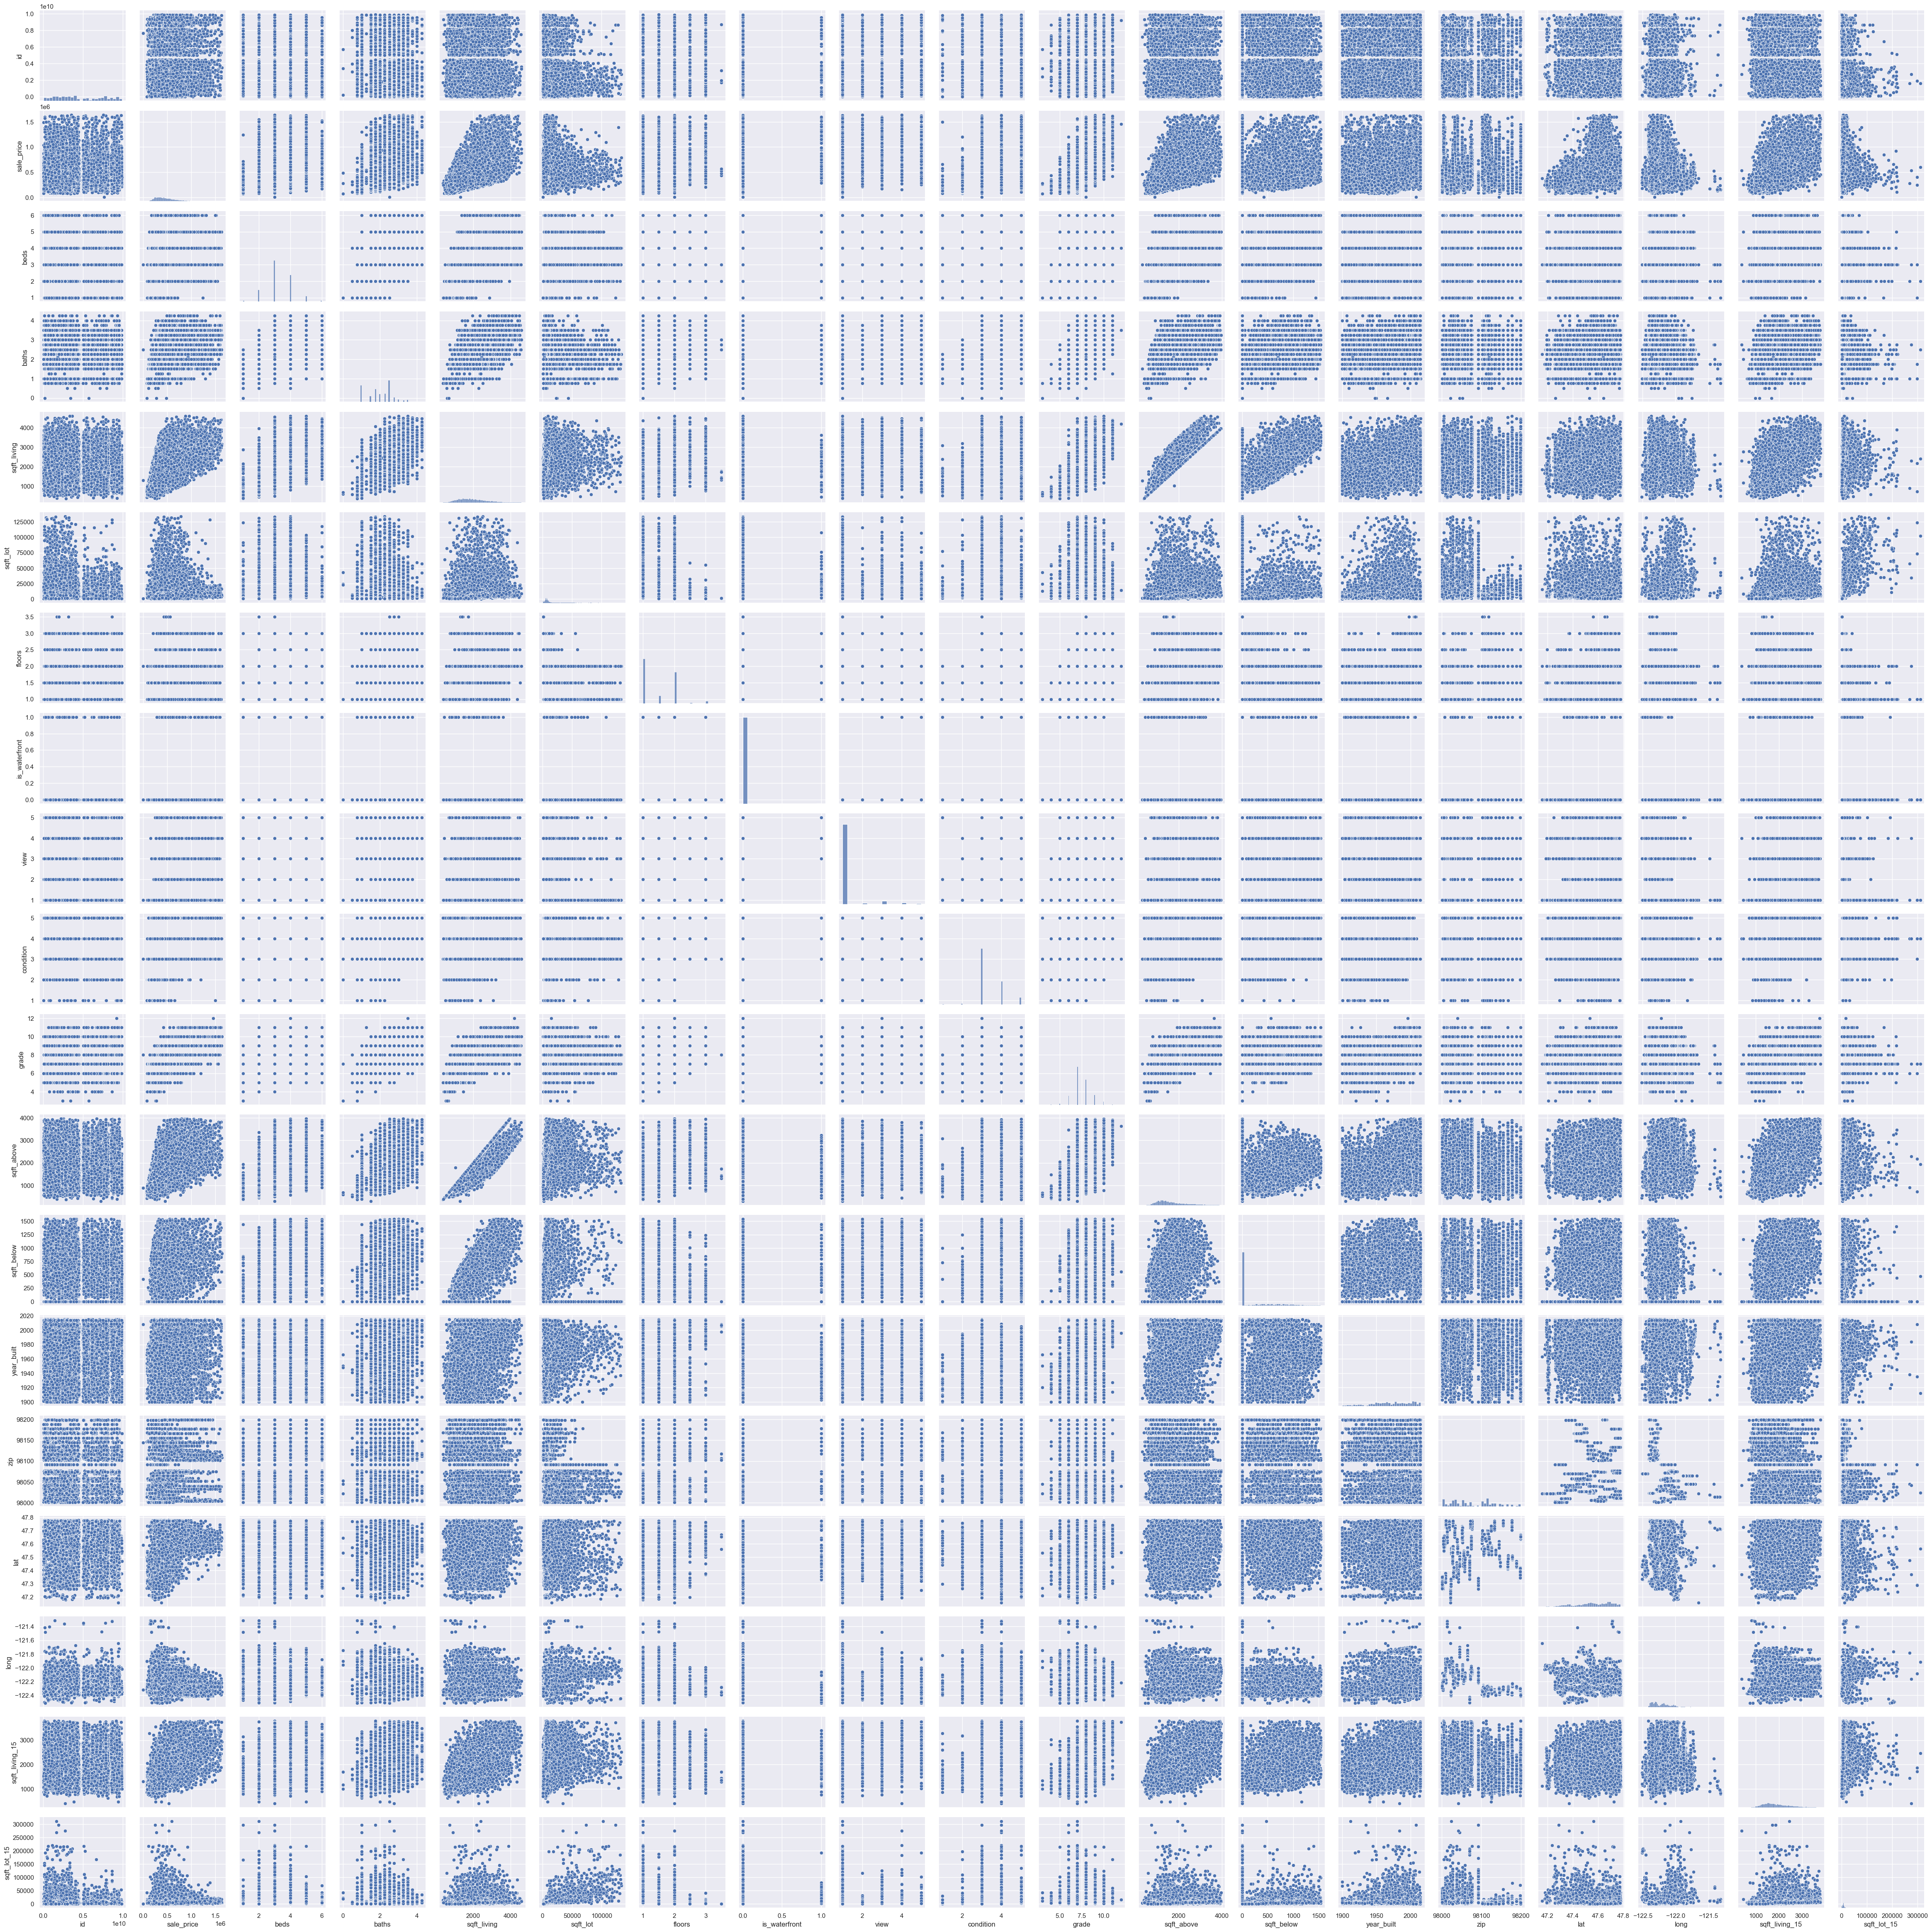

In [15]:
sns.pairplot(df)

In [17]:
df.columns.to_list()

['id',
 'sale_price',
 'date',
 'beds',
 'baths',
 'sqft_living',
 'sqft_lot',
 'floors',
 'is_waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_below',
 'year_built',
 'zip',
 'lat',
 'long',
 'sqft_living_15',
 'sqft_lot_15']

In [22]:
df=df[['sale_price',
 'sqft_living',
 'view',
 'condition',
 'grade']]
df

sale_price  sqft_living  view  condition  grade
0          221900         1180     1          3    7.0
1          538000         2570     1          3    7.0
2          180000          770     1          3    6.0
3          604000         1960     1          5    7.0
4          510000         1680     1          3    8.0
...           ...          ...   ...        ...    ...
20458      360000         1530     1          3    8.0
20459      400000         2310     1          3    8.0
20460      402101         1020     1          3    7.0
20461      400000         1600     1          3    8.0
20462      325000         1020     1          3    7.0

[20463 rows x 5 columns]

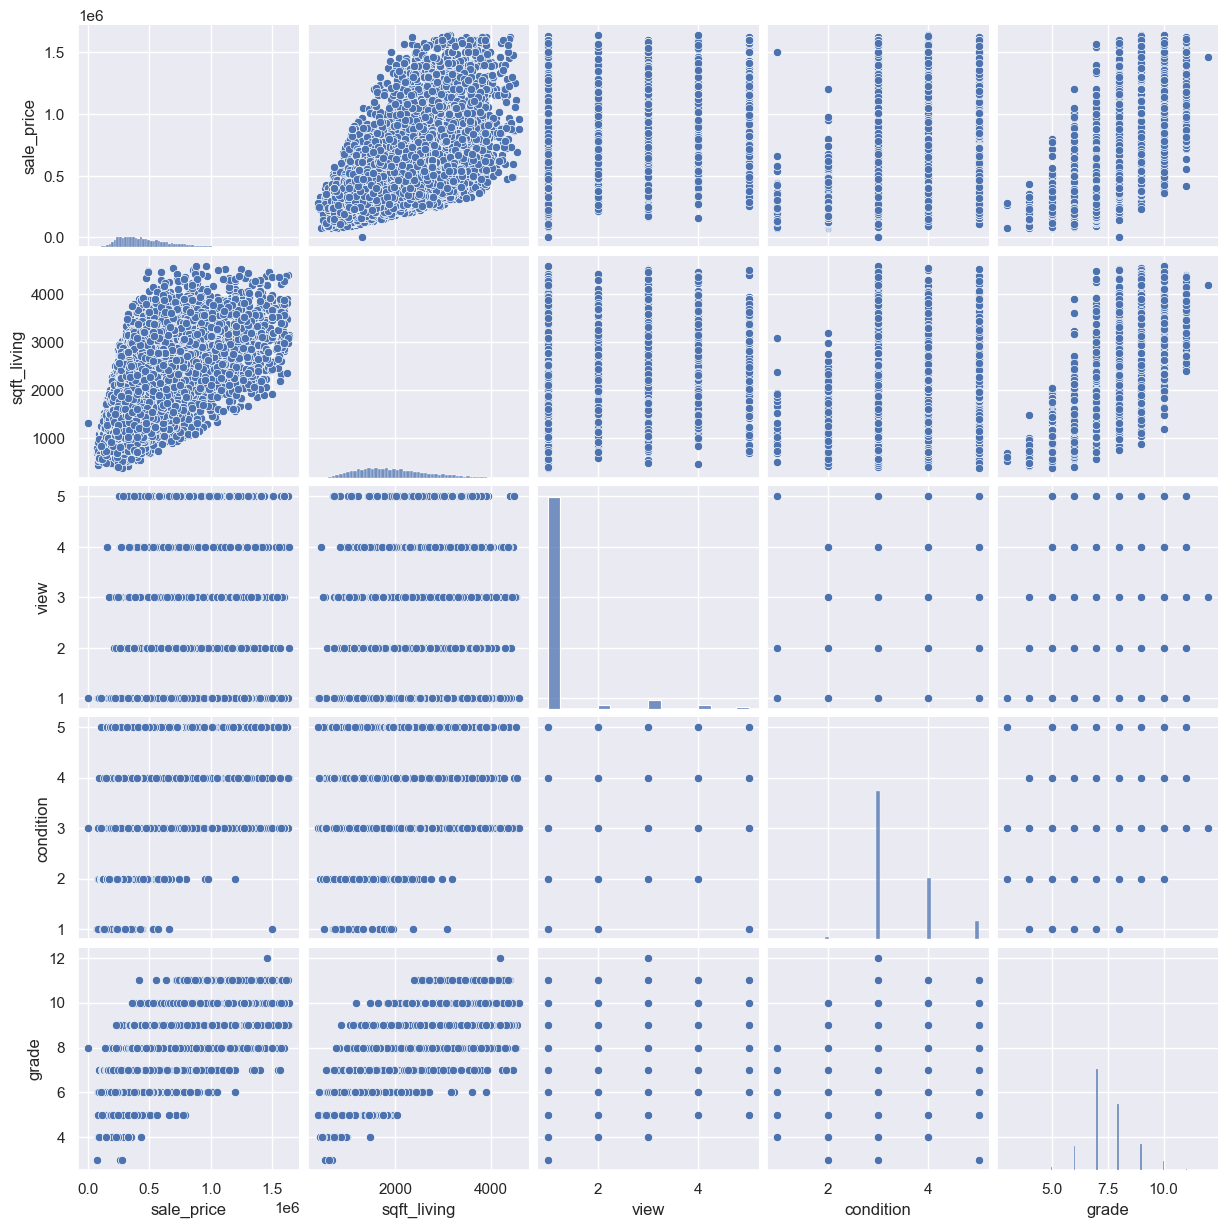

In [23]:
sns.pairplot(df)

In [26]:
price_matrix=df.corr()
price_matrix

sale_price  sqft_living      view  condition     grade
sale_price     1.000000     0.613148  0.296607   0.060888  0.626404
sqft_living    0.613148     1.000000  0.178880  -0.051810  0.701521
view           0.296607     0.178880  1.000000   0.039310  0.160208
condition      0.060888    -0.051810  0.039310   1.000000 -0.146331
grade          0.626404     0.701521  0.160208  -0.146331  1.000000

<AxesSubplot:>

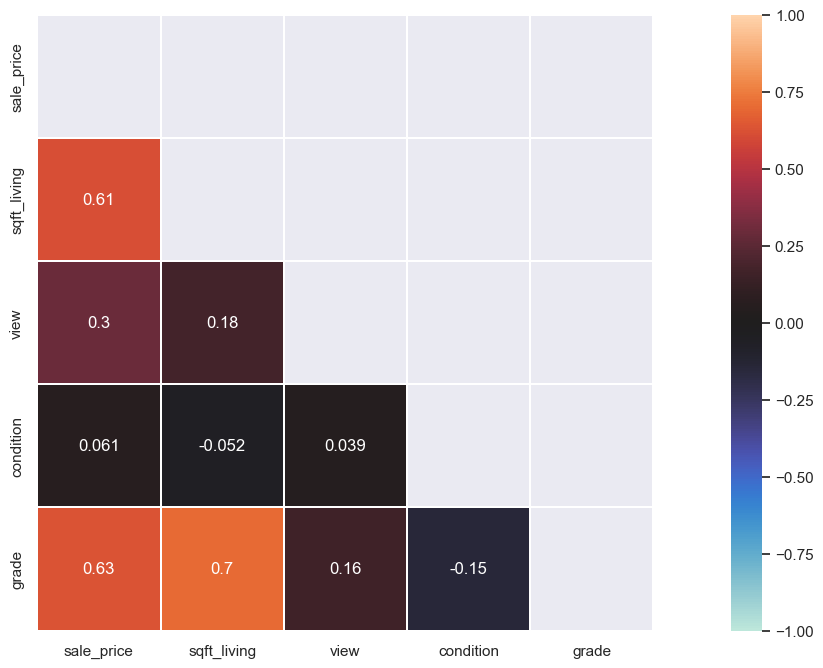

In [30]:
plt.figure(figsize=(20,8))
top=np.triu(price_matrix)
sns.heatmap(price_matrix, vmax=1, vmin=-1, center=0, linewidth=.25, square=True, annot=True, mask=top)

### Step 3: Determine independent and dependent variable

In [32]:
# set X 
x1=df.grade
# set Y 
y=df.sale_price

Text(0.5, 1.0, 'Distribution of Home Sales Prices by Grade')

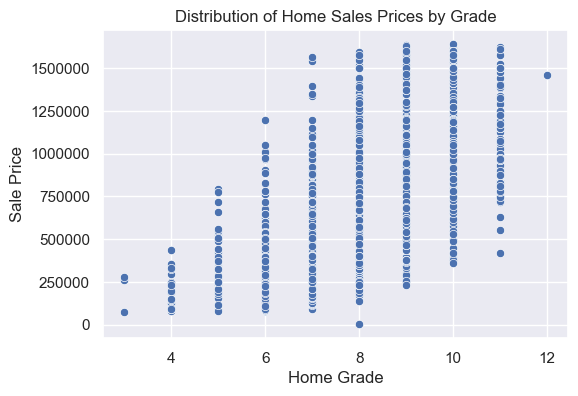

In [58]:
# visualize relationship between X and Y
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='grade', y='sale_price', markers='o')

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Sale Price')
plt.xlabel('Home Grade')
plt.title('Distribution of Home Sales Prices by Grade')


In [60]:
df.head()

sale_price  sqft_living  view  condition  grade
0      221900         1180     1          3    7.0
1      538000         2570     1          3    7.0
2      180000          770     1          3    6.0
3      604000         1960     1          5    7.0
4      510000         1680     1          3    8.0

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [59]:
# fit model to X and Y variables (you will need to make more cells)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:57:34   Log-Likelihood:            -2.7743e+05
No. Observations:               20463   AIC:                         5.549e+05
Df Residuals:                   20461   BIC:                         5.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.132e+05   9655.023    -63.508      0.000   -6.32e+05   -5.94e+05
grade       1.463e+05   1273.021    114.948      0.000    1.44e+05    1.49e+05
==============================================================================
Omnibus:                     4316.169   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10507.752
Skew:                           1.172   Prob(JB):                         0.00
Kurtosis:                       5.613   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5: Interpret Model Summary 

In [9]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared - .392 - This means the grade of the home explains 39.92% of the sales price
- Coefficient of independent variable - 1.463 - Meaning for an increase of 1 grade the average sale price would increase 146300
- P-value of T-statistic - .000 - Indicates strong evidence the independent variable has an effect on the dependent var since it's less than .05
- P-value of F-statistic - 0.00 - Indicates there is a significant relationship.  Makes sense because there is only one variable.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [79]:
new_df=pd.DataFrame({'constant':1, 'grade':[5, 8]})
new_df

constant  grade
0         1      5
1         1      8

In [80]:
predictions = results.predict(new_df)
predictions

0    118489.963811
1    557484.519873
dtype: float64

In [81]:
new_df['price_prediction']=results.predict(new_df)
new_df

constant  grade  price_prediction
0         1      5     118489.963811
1         1      8     557484.519873

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [88]:
df.head()

sale_price  sqft_living  view  condition  grade
0      221900         1180     1          3    7.0
1      538000         2570     1          3    7.0
2      180000          770     1          3    6.0
3      604000         1960     1          5    7.0
4      510000         1680     1          3    8.0

In [90]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

y=df.sale_price
x1=df[['grade', 'sqft_living']]

grade  sqft_living
0        7.0         1180
1        7.0         2570
2        6.0          770
3        7.0         1960
4        8.0         1680
...      ...          ...
20458    8.0         1530
20459    8.0         2310
20460    7.0         1020
20461    8.0         1600
20462    7.0         1020

[20463 rows x 2 columns]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [93]:
# fit new regression model (you will need to make more cells)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8431.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:33:47   Log-Likelihood:            -2.7638e+05
No. Observations:               20463   AIC:                         5.528e+05
Df Residuals:                   20460   BIC:                         5.528e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.12e+05   1.01e+04    -40.718      0.000   -4.32e+05   -3.92e+05
grade        9.028e+04   1696.779     53.205      0.000     8.7e+04    9.36e+04
sqft_living   113.2855      2.406     47.091      0.000     108.570     118.001
==============================================================================
Omnibus:                     4044.549   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9730.930
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       5.552   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared - .452 - model explains 45.2% of what determines the sale price.
- Adjusted R-squared - .452.  Possibly because the addition of sq_ft doesn't really improve the model much.
- Coefficient of independent variables - 90280 for grade and 113.28 for sq_ft meaning home price increases 90280 per 1 grade increase and 113.28 for every 1 extra sq_ft.
- P-value of T-statistic - 0.00 for both meaning they are both statistically significant since below .05.
- P-value of F-statistic - 0.00 for the model meaning there is at least one variable  significantly related to the output.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

In [94]:
y=df.sale_price
x1=df[['grade', 'sqft_living', 'view']]

In [95]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     6371.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:41:32   Log-Likelihood:            -2.7578e+05
No. Observations:               20463   AIC:                         5.516e+05
Df Residuals:                   20459   BIC:                         5.516e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.522e+05   9892.269    -45.709      0.000   -4.72e+05   -4.33e+05
grade        8.741e+04   1649.888     52.978      0.000    8.42e+04    9.06e+04
sqft_living   105.4941      2.347     44.952      0.000     100.894     110.094
view         6.522e+04   1856.732     35.124      0.000    6.16e+04    6.89e+04
==============================================================================
Omnibus:                     3657.416   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8642.051
Skew:                           1.014   Prob(JB):                         0.00
Kurtosis:                       5.454   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4: Predict Values

In [98]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df=pd.DataFrame({'constant':1, 'grade':[5, 8], 'sqft_living':[2500,3200], 'view':[3,5]})
new_df

constant  grade  sqft_living  view
0         1      5         2500     3
1         1      8         3200     5

In [99]:
predictions = results.predict(new_df)
predictions

0    444261.024646
1    910763.345802
dtype: float64

In [100]:
new_df['price_prediction']=results.predict(new_df)
new_df

constant  grade  sqft_living  view  price_prediction
0         1      5         2500     3     444261.024646
1         1      8         3200     5     910763.345802

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [102]:
# create new markdown cell and write down your observations


The addition of more variables appear to strengthen the model at least in these examples.  This makes sense because we are
utilizing variables that had the strongest correlation to the dependent variable.  The p value for all of the variables being 
used is below the .05 threshold.  Additionally the R squared increased as we add variables and prob F-stat remains at 0.

# Part 4 - Multivariate Time Series Analysis

In [17]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 